# Name - Ashishkumar Rana

# Data Science & Business Analytics intern at The Sparks Foundation.

# Graduate Rotational Internship Program (Batch - August 2021).


# Problem Statement :

   - Predict the percentage of an student based on the no. of study hours.
   - This is a simple linear regression problem as it involves just 2 variables.
   - What will be predicted score if a student studies for 9.25 hrs/ day?.
               
# Data can be found at - http://bit.ly/w-data 


# Prediction using Supervised ML

# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Importing Data set into Python

In [2]:
Url = "http://bit.ly/w-data"
data = pd.read_csv(Url)
print(data.head(10))

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81
9    2.7      25


# Data preprocessing

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.shape

(25, 2)

In [6]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

# To Find Data type and missing values in data

In [7]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


- 1} Here as you can see, There are no missing values present in the data set.
- 2} Independent variable are of float data type where as dependent variable are of integer data type.

# Descriptive statistics

In [34]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


- describe() function tell us five number summary that is min, max, quartile, mean, count.

# Finding Missing values in data set if any

In [35]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

- Here we can see that, there are no missing values present in data

# Correlation

In [36]:
data.corr() # Correlation tells us the relationship between variables present in data.

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


- Based on the output, we observed that there is high correlation between Study hours and marks scored by the student.

# Data Visualization

### Scatter plot to see the distribution of data 

Text(0, 0.5, 'Marks Score')

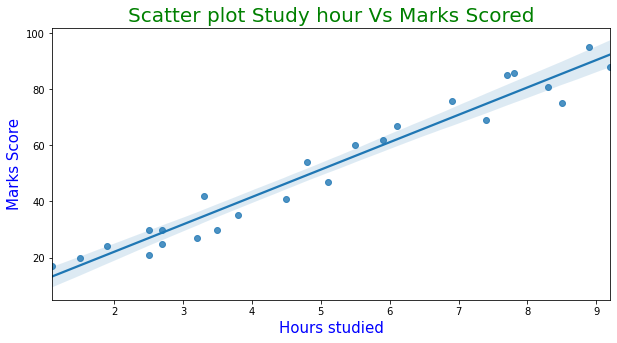

In [38]:
plt.figure(figsize=(10,5))
sns.regplot(x = "Hours", y = "Scores", data = data ) 
plt.title("Scatter plot Study hour Vs Marks Scored", size = 20, color = "Green")
plt.xlabel("Hours studied", size = 15, color = "Blue")
plt.ylabel("Marks Score", size = 15, color = "Blue")

- Graph shows that there is positive linear relationship betweeen Study hour and Marks scored by the students. 

# Correlation plot

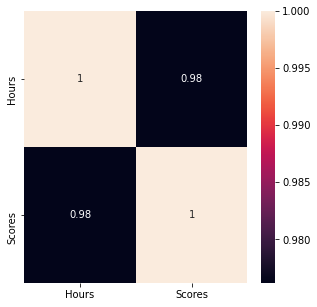

In [41]:
plt.figure(figsize=(5,5))
correlation_matrix = data.corr() # Correlation gives us the strength of relationship between variables present in data.
sns.heatmap(data=correlation_matrix, annot=True) # annot = True, to print the values inside the square.
plt.show()

- The above graph shows that there is high correlation between study hours and Marks scored by the students.

# Preparing the data

#   Dividing the data frame to independent and dependent variable

In [42]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the X,Y into train and test 

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                test_size=0.2, random_state=0) 


# Training the Algorithm

In [44]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)
print("Training Successfully Completed")

Training Successfully Completed


In [45]:
regressor.score(x_train,y_train)

0.9515510725211552

# Visualizing training data

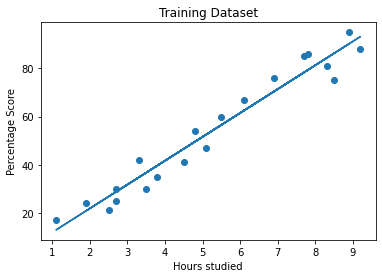

0.9515510725211552

In [46]:
plt.scatter(x_train,y_train)
plt.title('Training Dataset')
plt.plot(x_train,regressor.predict(x_train))
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()

regressor.score(x_train,y_train) 

# Visualizing testing  data

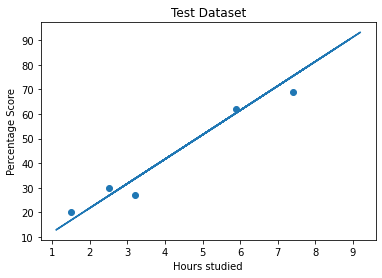

0.9454906892105355

In [47]:
plt.scatter(x_test,y_test)
plt.title('Test Dataset')
plt.plot(x_train,regressor.predict(x_train))
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()
regressor.score(x_test,y_test)

In [48]:
print("Training Score:",regressor.score(x_train,y_train))
print("Test Score:",regressor.score(x_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105355


# Plotting the regression line

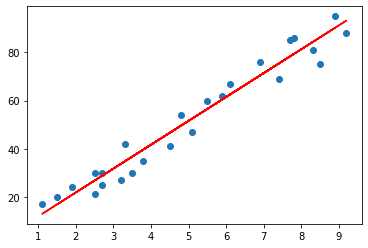

In [49]:
best_fitline = regressor.coef_*x+regressor.intercept_
plt.scatter(x, y)
plt.plot(x, best_fitline, color = 'Red');
plt.show()

# Values of Intercept and Coefficient

In [50]:
print('Intercept is :',regressor.intercept_)
print('Coefficient is :',regressor.coef_)

Intercept is : 2.0181600414346974
Coefficient is : [9.91065648]


- If a student studies for one more hour than there is an increase of 9.91% in Total score

# Making prediction

In [51]:
print(x_test) 
y_predic = regressor.predict(x_test)
y_predic

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# Comparing actual and predicted value


In [52]:
df = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': y_predic})    
df

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Visualizing the Actual and Predicted value using barplot

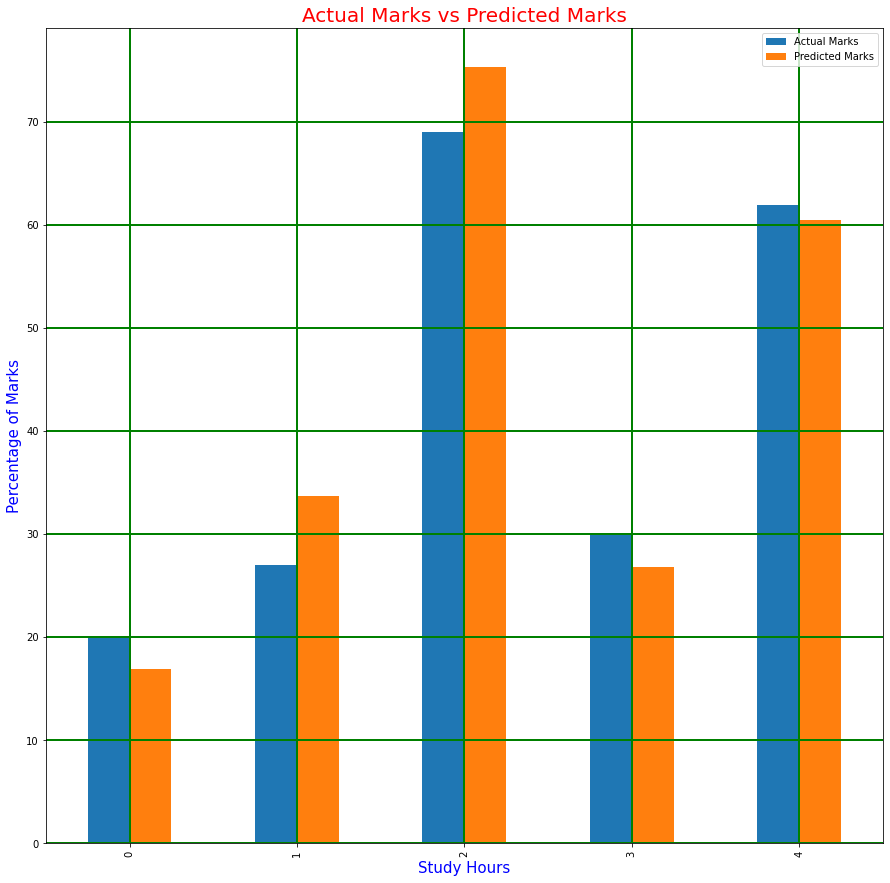

In [53]:
df.plot(kind = "bar", figsize = (15 , 15) )
plt.grid(which='major', color = "Green" , linewidth = 2)
plt.grid(which='minor',  linewidth = 2 )
plt.title('Actual Marks vs Predicted Marks', size=20 ,color="Red")
plt.ylabel('Percentage of Marks', size=15,color="Blue")
plt.xlabel('Study Hours', size=15 , color = "Blue")
plt.show()

# Model Evaluation

In [54]:
# Importing metrics from sklearn 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [55]:
# To find Mean Absolute Error(mse)
mse = (mean_absolute_error(y_test, y_predic))
print("MAE:",mse)

MAE: 4.183859899002975


In [56]:
# To find Root Mean Squared Error(rmse)
rmse = (np.sqrt(mean_squared_error(y_test, y_predic)))
print("RMSE:",rmse)


RMSE: 4.647447612100367


In [57]:
# To find coefficient of determination
r2 =  r2_score(y_test, y_predic)
print("R-Square:",r2)

R-Square: 0.9454906892105355


# Testing with your own data

In [58]:
hours = np.array([9.25]) # No. of hours should be mentioned inside array
hours = hours.reshape(-1,1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(float(hours)))
print("Predicted Score = {}".format(round(own_pred[0],2)))

No of Hours = 9.25
Predicted Score = 93.69


# Q. What will be predicted score if a student studies for 9.25 hrs/ day?

In [61]:
hours = float(input("Enter study hours:"))
hours = [[hours]]
regressor.predict(hours)

Enter study hours:9.25


array([93.69173249])

# Conclusion:
   - Here i conclude that if a Student studies for 9.25 hours/day then the predicted score will be 93.69%

# Thank You